### IMPORT PACKAGES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn. impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import plotly.subplots as make_subplots
import plotly.graph_objects as go
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler





# Data Exploration and Visualization

In [ ]:
data = pd.read_csv('CouponRecommendation.csv')

In [ ]:
data.shape

(12684, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [ ]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.head(7)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1


In [ ]:
data.isnull().values.any()


True

In [ ]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [ ]:
data.isnull().sum().sum()

13370

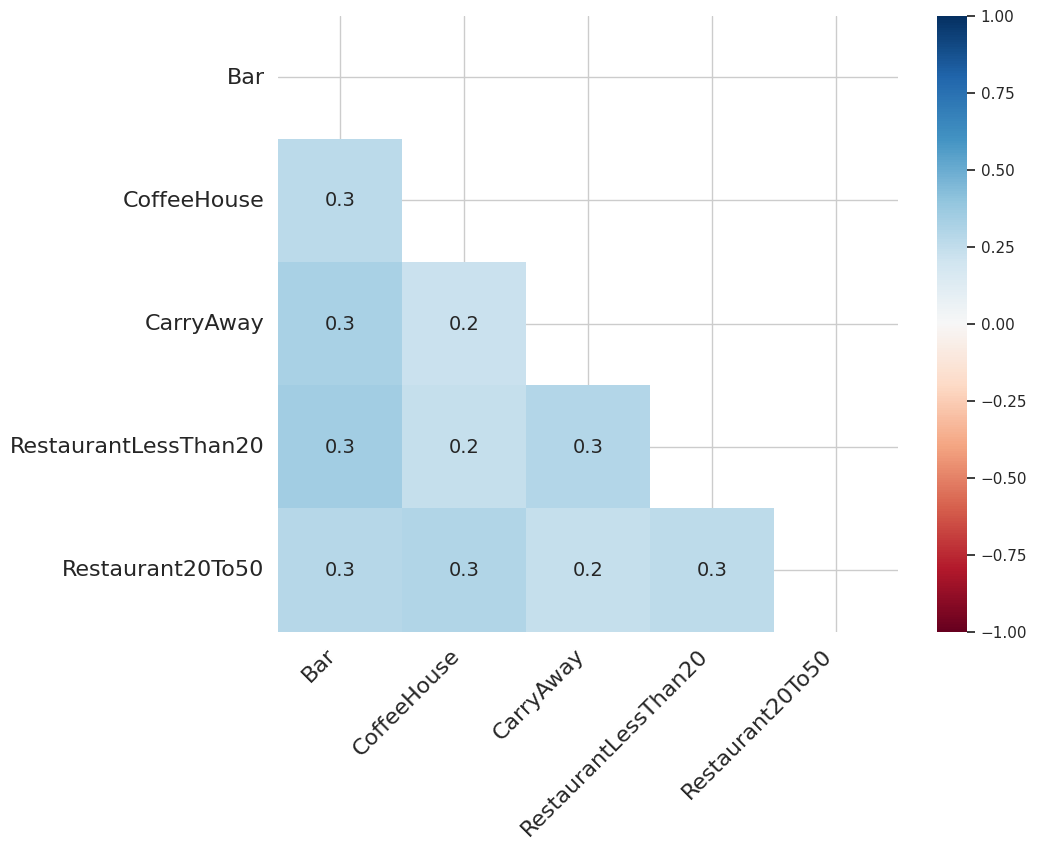

In [ ]:

na_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
na_df = data[na_columns]
msno.heatmap(na_df, figsize=(10, 8));


In [ ]:
data.notnull().values.any()

True

In [ ]:
data.notnull().sum().sum()

316414

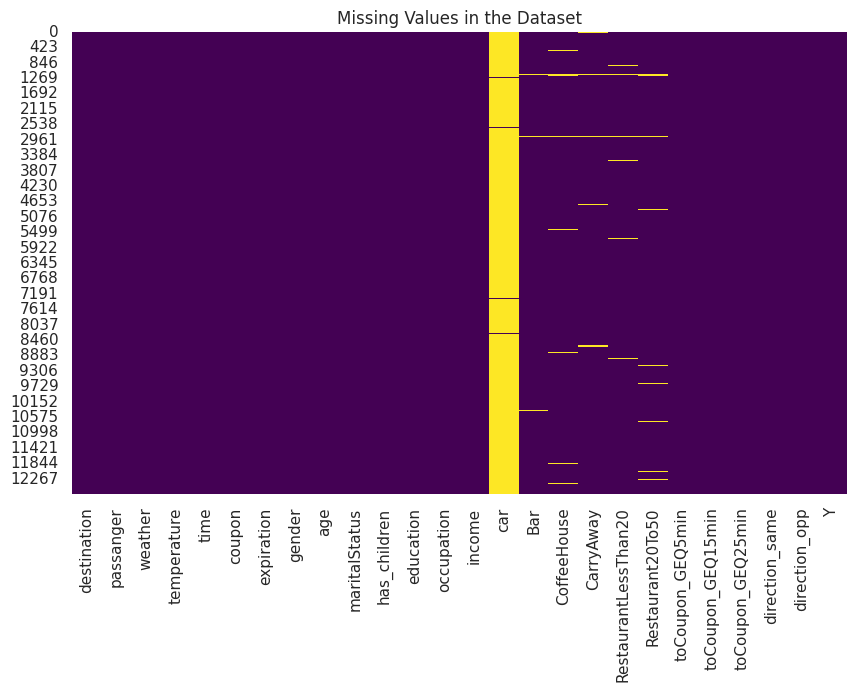

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

#Remove duplicated data

In [ ]:
data = data.drop('car', axis=1)

In [ ]:
duplicate = data[data.duplicated(keep = 'last')] #(74, 26)
data = data.drop_duplicates()
print("Shape of dataset after removing duplicates:",data.shape)

Shape of dataset after removing duplicates: (12610, 25)


#Visualize some data

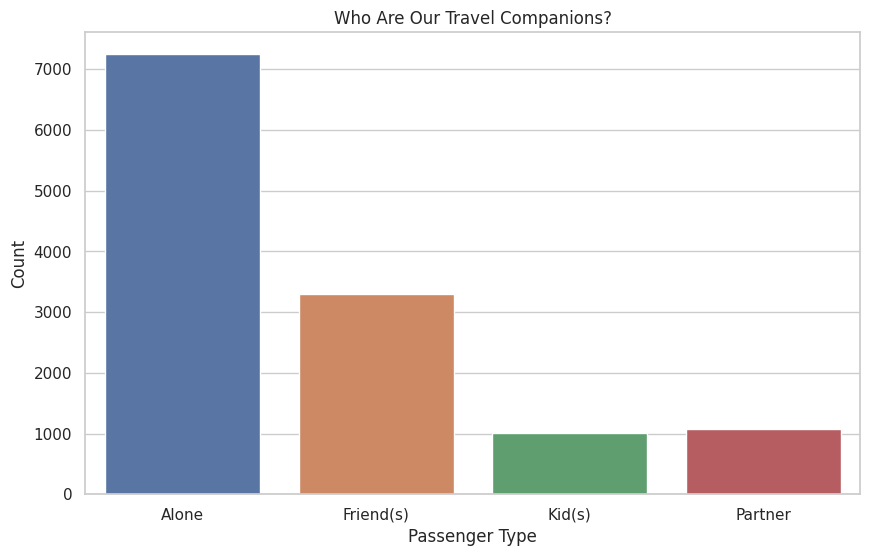

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='passanger')
plt.title("Who Are Our Travel Companions?")
plt.xlabel("Passenger Type")
plt.ylabel("Count")
plt.show()

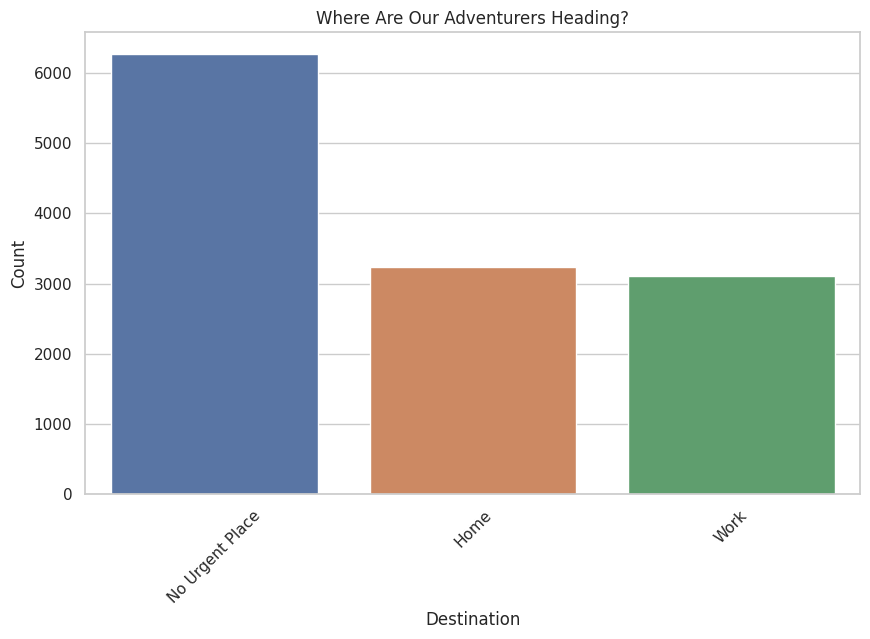

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='destination')
plt.title("Where Are Our Adventurers Heading?")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12503 non-null  object
 15  CoffeeHouse           12393 non-null

In [ ]:
Y_counts = data.groupby('Y').Y.count()
print('Accepted coupon:',Y_counts[1],round(Y_counts[1]/data.shape[0]*100,3),'%')
print('Rejected coupon:',Y_counts[0],round(Y_counts[0]/data.shape[0]*100,3),'%')

Accepted coupon: 7157 56.757 %
Rejected coupon: 5453 43.243 %


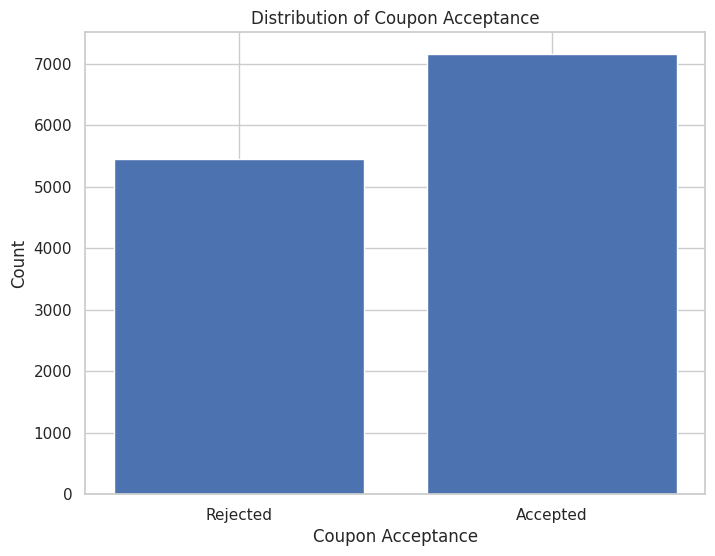

In [ ]:

# Data
Y_counts = data.groupby('Y').Y.count()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(Y_counts.index, Y_counts.values)
plt.xlabel('Coupon Acceptance')
plt.ylabel('Count')
plt.title('Distribution of Coupon Acceptance')
plt.xticks([0, 1], ['Rejected', 'Accepted'])
plt.show()


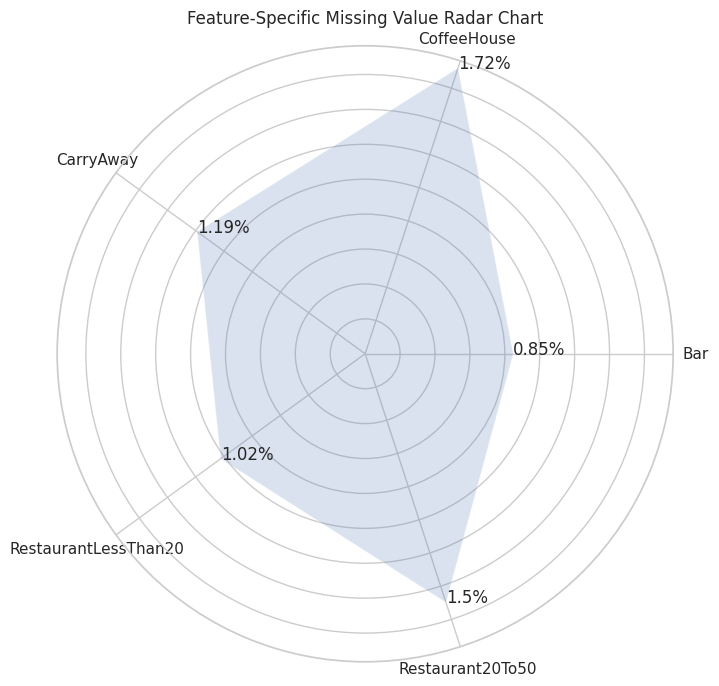

In [ ]:

# Define the features you want to check for missing values
selected_features = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

# Calculate the percentage of missing values for each feature
missing_percentages = [(data[feature].isnull().sum() / len(data)) * 100 for feature in selected_features]

# Create a radar chart to visualize missing values
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

# Set angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(selected_features), endpoint=False).tolist()
angles += angles[:1]

# Plot the radar chart
ax.fill(angles, missing_percentages + missing_percentages[:1], 'b', alpha=0.2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(selected_features)
ax.set_yticklabels([])
ax.set_title('Feature-Specific Missing Value Radar Chart')

# Show missing percentage values on the chart
for angle, value in zip(angles, missing_percentages):
    ax.annotate(f'{str(round(value, 2))}%', xy=(angle, value))

plt.show()


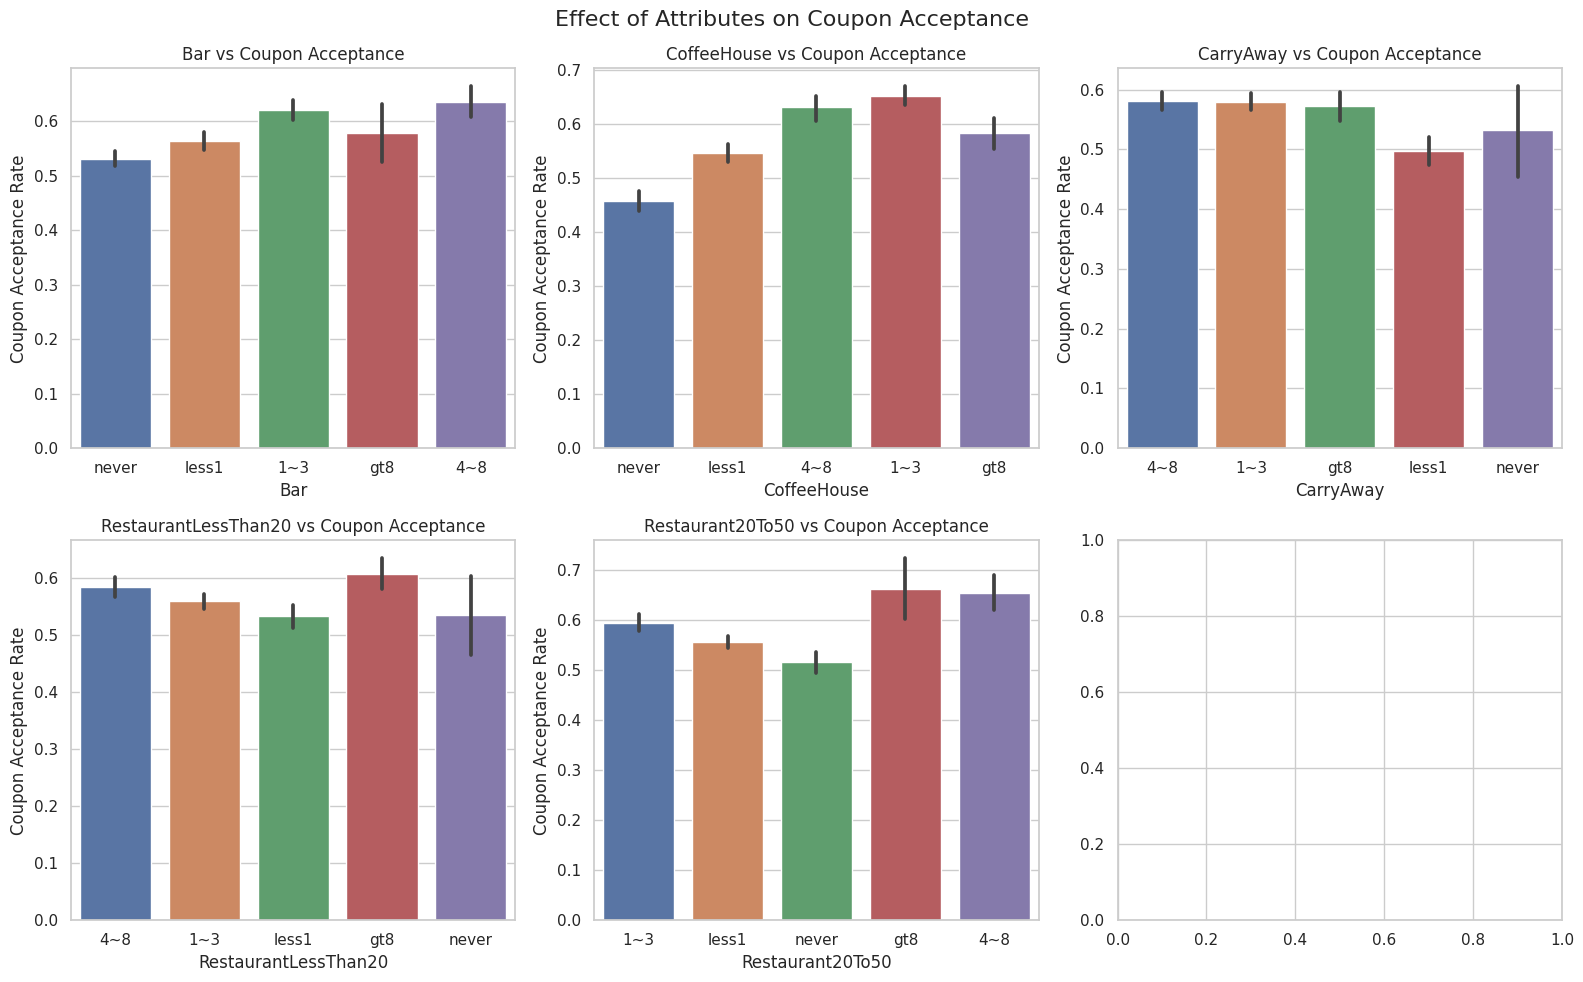

In [ ]:

# Define the attributes you want to explore
attributes_to_explore = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Create subplots for each attribute
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.suptitle('Effect of Attributes on Coupon Acceptance', fontsize=16)

for i, attribute in enumerate(attributes_to_explore):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    sns.barplot(x=attribute, y='Y', data=data, ax=ax)
    ax.set_title(f'{attribute} vs Coupon Acceptance')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Coupon Acceptance Rate')

plt.tight_layout()
plt.show()


#DATA Imputation and Manipulation

In [ ]:
# Specify the attributes to impute
attributes_to_impute = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']
# Initialize the imputer with the 'most_frequent'
imputer = SimpleImputer (strategy='most_frequent')
# Fit and transform the imputer on the selected attributes
data[attributes_to_impute] = imputer.fit_transform(data[attributes_to_impute])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

In [ ]:
data.corr()

<ipython-input-833-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


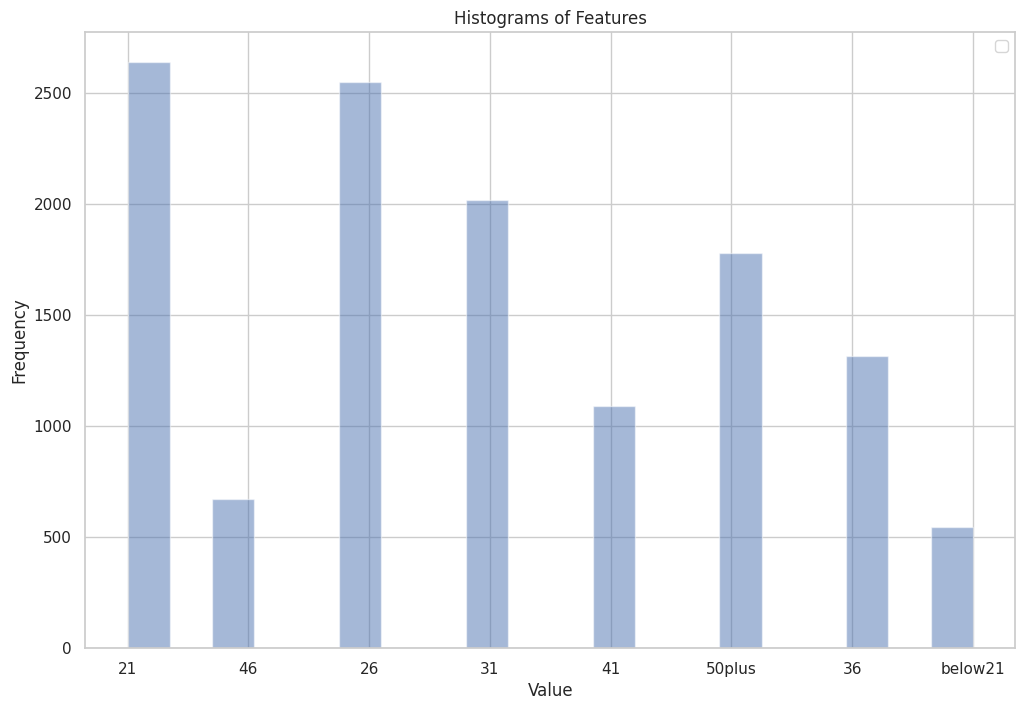

In [ ]:


# Create histograms for each feature in your dataset
plt.figure(figsize=(12, 8))
plt.title("Histograms of Features")

#for column in data.columns:
plt.hist(data['age'], bins=20, alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()



In [ ]:
data.drop(columns=['toCoupon_GEQ5min'], inplace=True)


In [ ]:
data.drop(columns=['direction_opp'], inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

In [ ]:
data.select_dtypes('object').nunique()


destination              3
passanger                4
weather                  3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
dtype: int64

<ipython-input-839-30b49dfb84e6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



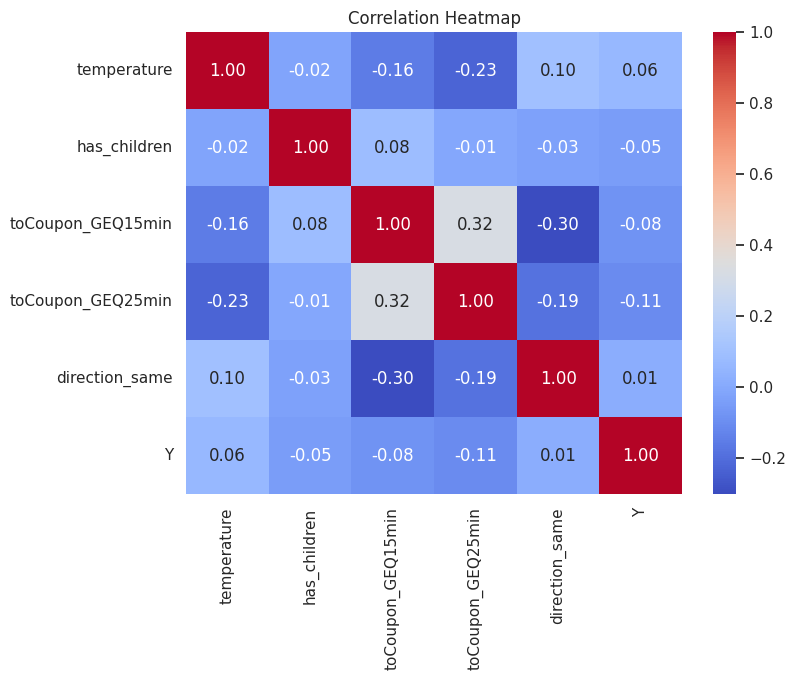

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

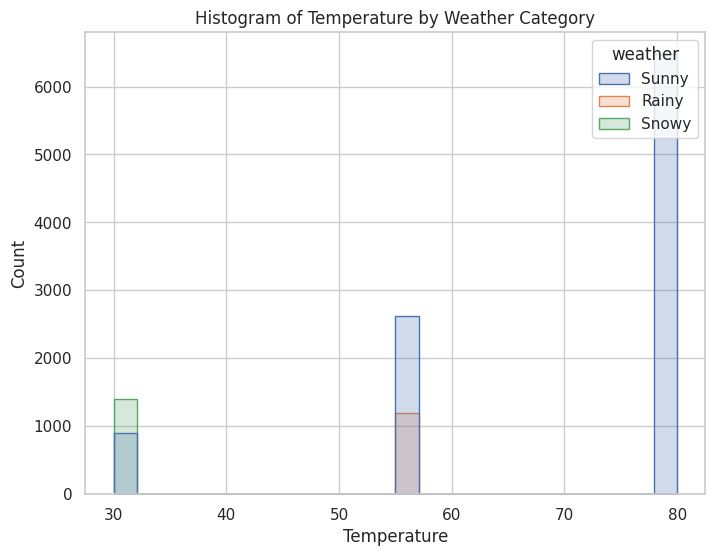

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="temperature", hue="weather", element="step", common_norm=False)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Histogram of Temperature by Weather Category")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

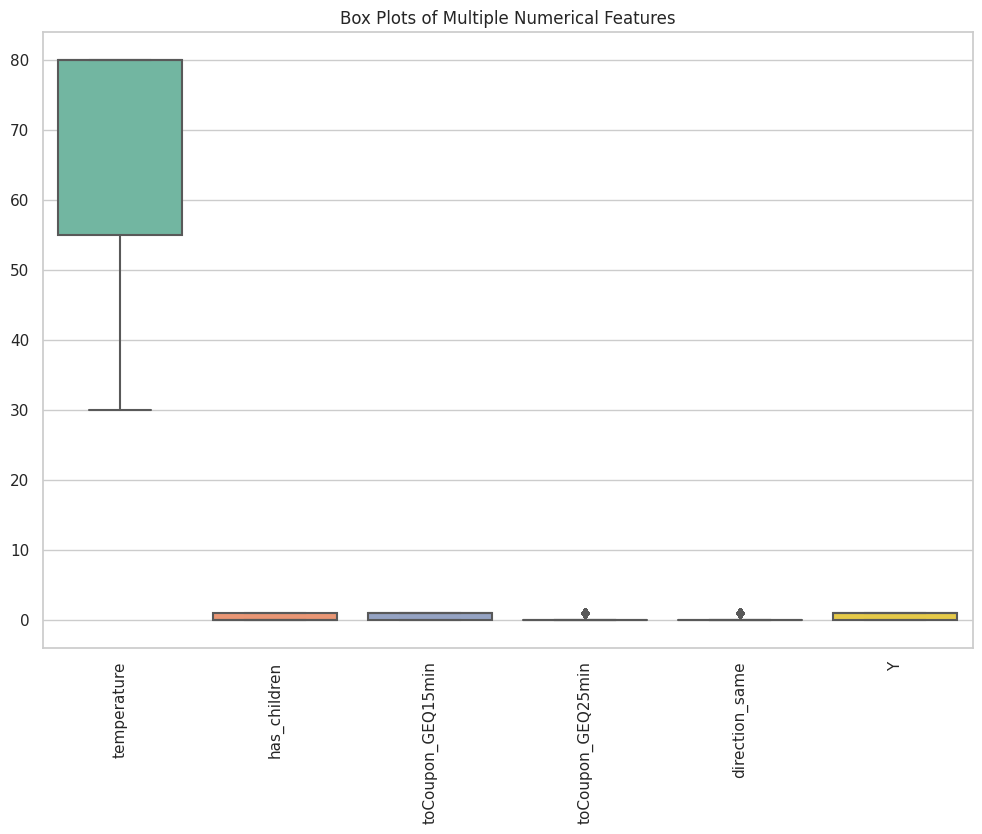

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient='vertical', palette='Set2')  # 'df' is your DataFrame with multiple numerical
plt.title('Box Plots of Multiple Numerical Features')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [ ]:
binary_feature = 'temperature'

# Count the occurrences of 0 and 1
binary_counts = data[binary_feature].value_counts().reset_index()
binary_counts.columns = ['Value', 'Count']

# Create an interactive bar plot using Plotly
fig = px.bar(binary_counts, x='Value', y='Count')
fig.update_layout(
    title=f'Bar Plot of {binary_feature}',
    xaxis_title=binary_feature,
    yaxis_title='Count'
)
fig.show()

In [ ]:
binary_feature = 'temperature'

# Create an interactive box plot using Plotly
fig = px.box(data, y=binary_feature)
fig.update_layout(
    title=f'Box Plot of {binary_feature}',
    yaxis_title=binary_feature,
)
fig.show()

In [ ]:
binary_feature = 'toCoupon_GEQ25min'

# Count the occurrences of 0 and 1
binary_counts = data[binary_feature].value_counts().reset_index()
binary_counts.columns = ['Value', 'Count']

# Create an interactive bar plot using Plotly
fig = px.bar(binary_counts, x='Value', y='Count')
fig.update_layout(
    title=f'Bar Plot of {binary_feature}',
    xaxis_title=binary_feature,
    yaxis_title='Count'
)
fig.show()

In [ ]:
binary_feature = 'toCoupon_GEQ25min'

# Create an interactive box plot using Plotly
fig = px.box(data, y=binary_feature)
fig.update_layout(
    title=f'Box Plot of {binary_feature}',
    yaxis_title=binary_feature,
)
fig.show()

In [ ]:
binary_feature = 'direction_same'

# Count the occurrences of 0 and 1
binary_counts = data[binary_feature].value_counts().reset_index()
binary_counts.columns = ['Value', 'Count']

# Create an interactive bar plot using Plotly
fig = px.bar(binary_counts, x='Value', y='Count')
fig.update_layout(
    title=f'Bar Plot of {binary_feature}',
    xaxis_title=binary_feature,
    yaxis_title='Count'
)
fig.show()

In [ ]:
binary_feature = 'direction_same'

# Create an interactive box plot using Plotly
fig = px.box(data, y=binary_feature)
fig.update_layout(
    title=f'Box Plot of {binary_feature}',
    yaxis_title=binary_feature,
)
fig.show()

In [ ]:


# Count the occurrences of each occupation and select the top 25
occupation_counts = data['occupation'].value_counts().head(25).reset_index()
occupation_counts.columns = ['Occupation', 'Frequency']

# Create an interactive bar chart using Plotly
fig = px.bar(occupation_counts, x='Occupation', y='Frequency', title='Top 25 Occupations')
fig.update_xaxes(categoryorder='total ascending')
fig.show()

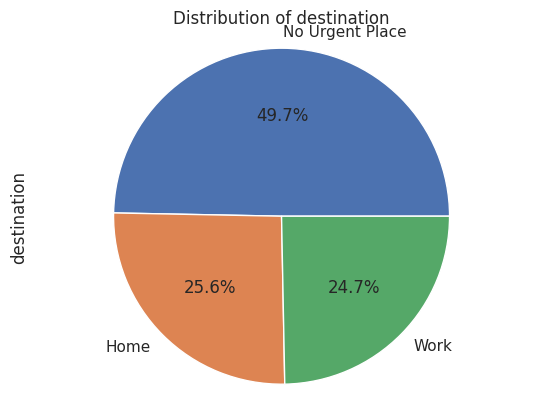

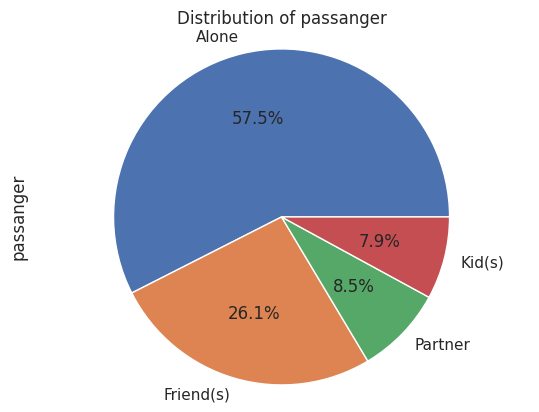

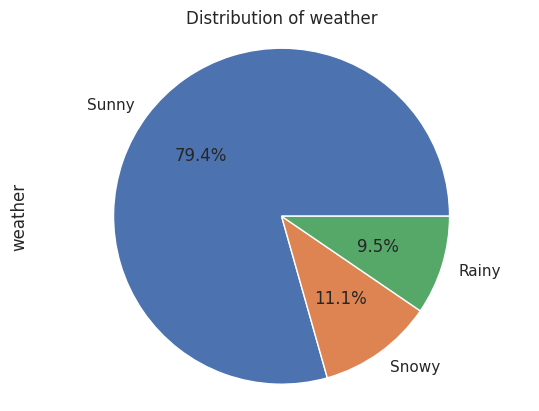

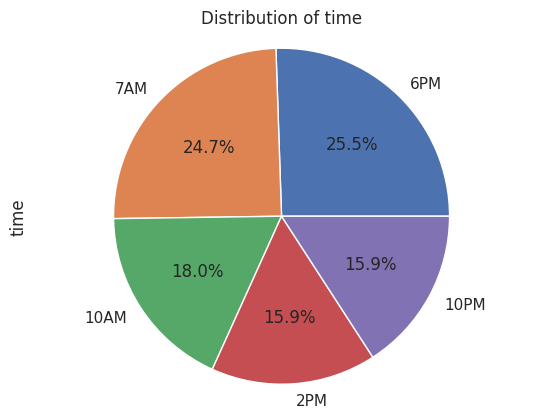

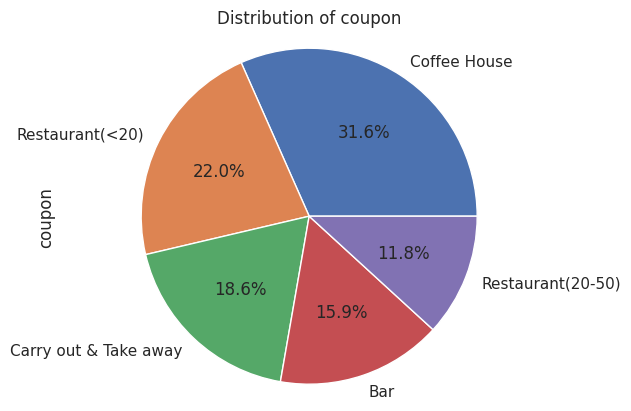

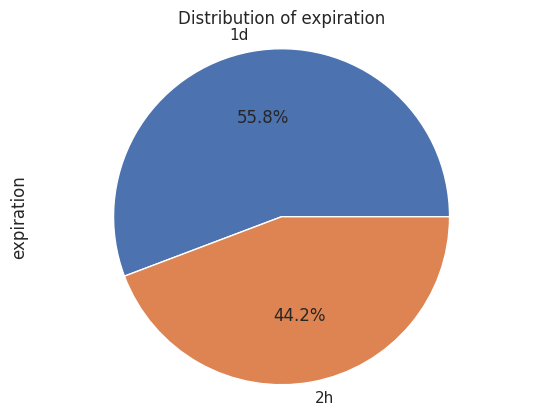

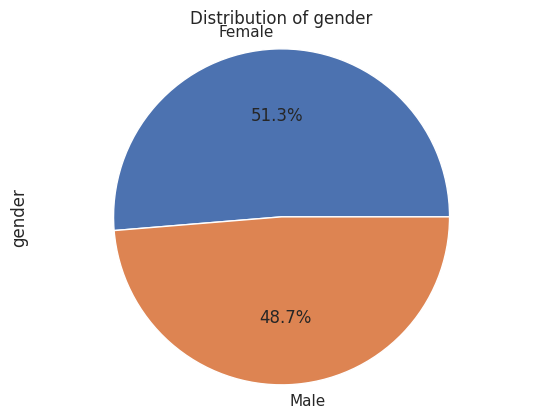

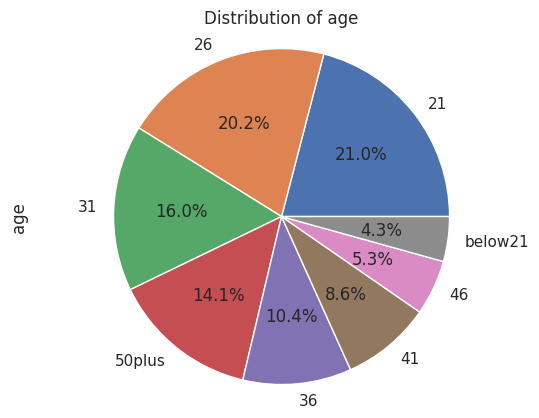

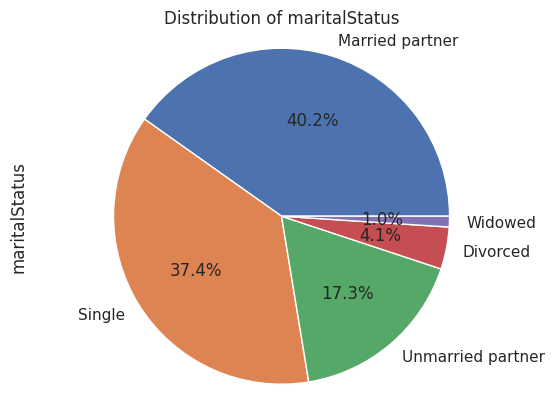

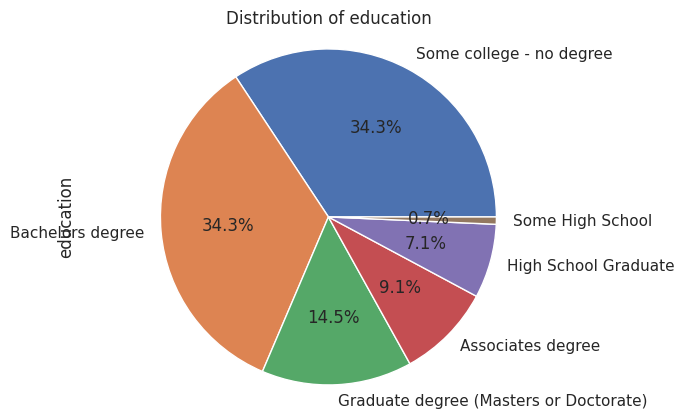

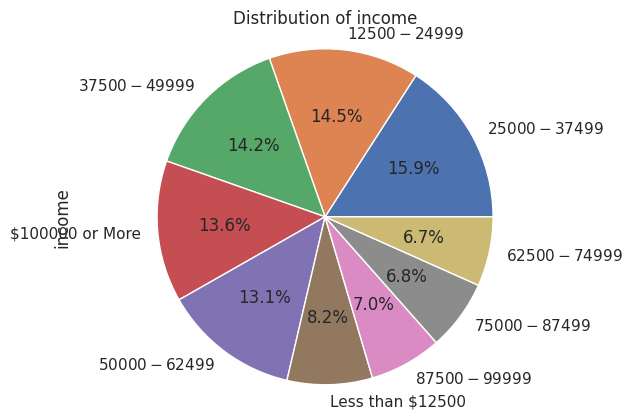

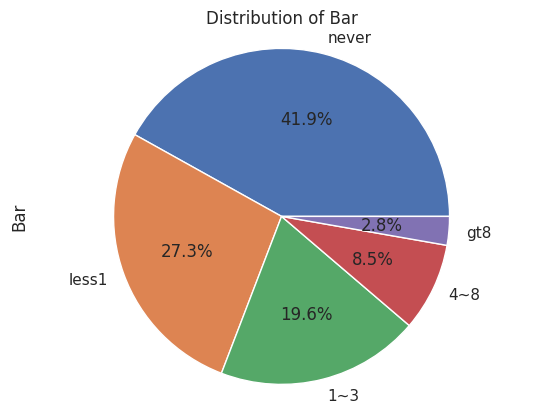

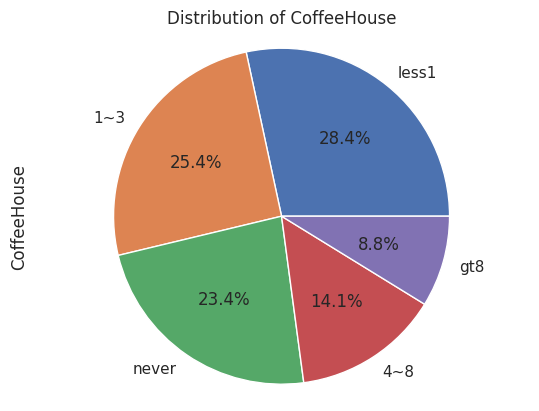

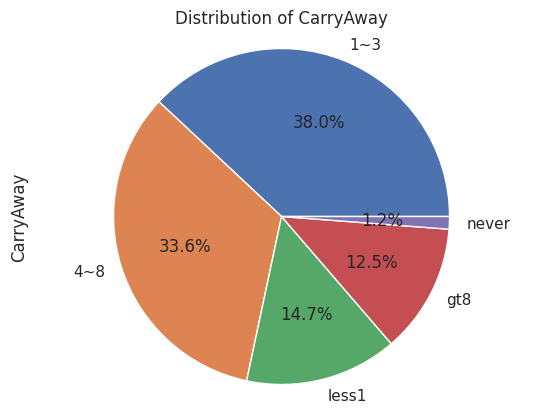

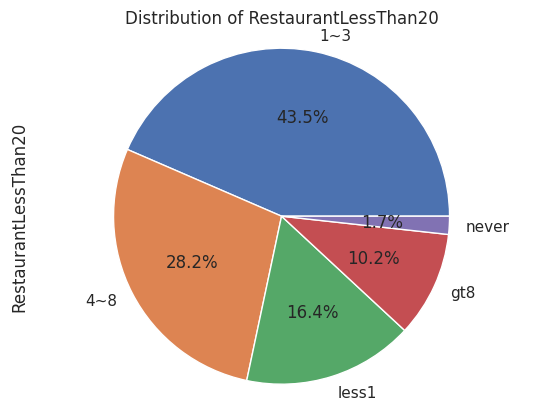

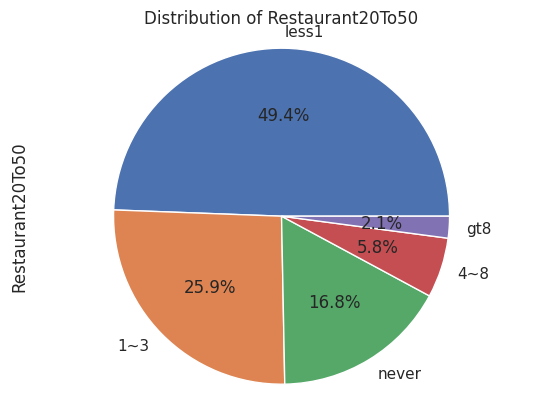

In [ ]:
categorical_attributes = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Parcourez chaque attribut catégoriel et créez un diagramme en secteurs
for attribute in categorical_attributes:
    category_counts = data[attribute].value_counts()
    category_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {attribute}')
    plt.axis('equal')  # Pour un cercle parfait

    plt.show()

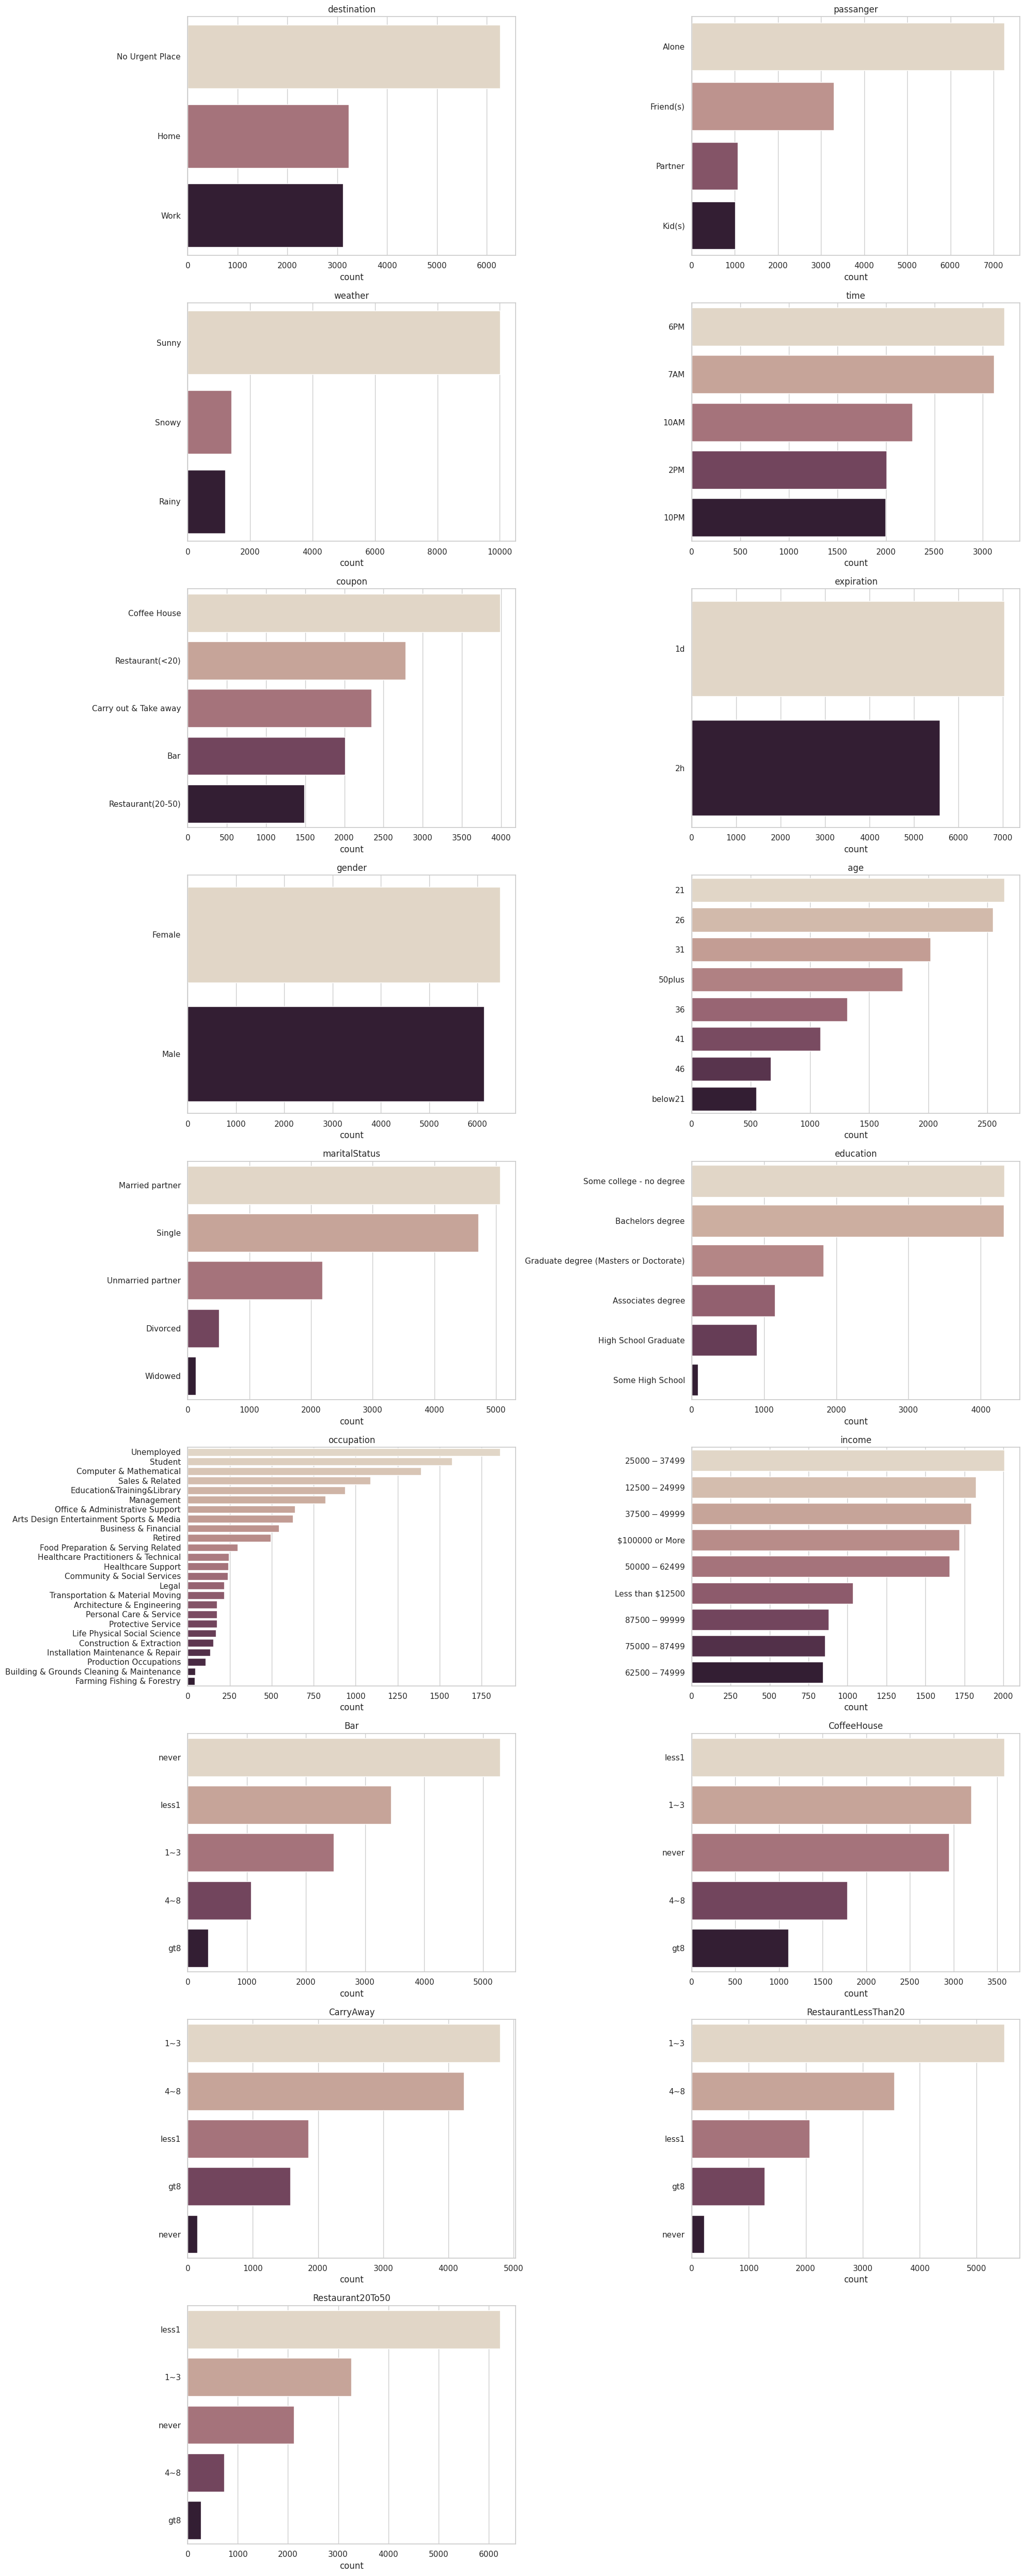

In [ ]:

# Define the number of rows and columns for the subplot grid
n_rows, n_cols = 9, 2

# Create subplots with individual bar plots for each categorical column
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 50))
for i, col in enumerate(data.select_dtypes('object').columns):
    sns.countplot(y=col, data=data, ax=axes[i // n_cols, i % n_cols], palette="ch:.25", order=data[col].value_counts().index)
    axes[i // n_cols, i % n_cols].set_title(col)
    axes[i // n_cols, i % n_cols].set_ylabel("")

# Remove any empty subplots in the grid
for i in range(n_rows * n_cols):
    if i >= len(data.select_dtypes('object').columns):
        fig.delaxes(axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()


#Encoding Data

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0


In [ ]:

label_encoder = LabelEncoder()
data['passenger_encoded'] = label_encoder.fit_transform(data['passanger'])
data = data.drop('passanger', axis=1)


In [ ]:
data.head()

,destination,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,passenger_encoded
0,No Urgent Place,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,never,1~3,4~8,1~3,0,0,0,1,0
1,No Urgent Place,Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,...,never,never,1~3,4~8,1~3,0,0,0,0,1
2,No Urgent Place,Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,never,1~3,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,...,never,never,1~3,4~8,1~3,1,0,0,0,1
4,No Urgent Place,Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,...,never,never,1~3,4~8,1~3,1,0,0,0,1


In [ ]:
label_encoder = LabelEncoder()
data['weather_encoded'] = label_encoder.fit_transform(data['weather'])
data = data.drop('weather', axis=1)

In [ ]:
label_encoder = LabelEncoder()
data['temperature_encoded'] = label_encoder.fit_transform(data['temperature'])
data = data.drop('temperature', axis=1)

In [ ]:
label_encoder = LabelEncoder()
data['gender_encoded'] = label_encoder.fit_transform(data['gender'])
data = data.drop('gender', axis=1)

In [ ]:
label_encoder = LabelEncoder()
data['destination_encoded'] = label_encoder.fit_transform(data['destination'])
data = data.drop('destination', axis=1)

In [ ]:
label_encoder = LabelEncoder()
data['maritalStatus_encoded'] = label_encoder.fit_transform(data['maritalStatus'])
data = data.drop('maritalStatus', axis=1)

In [ ]:
label_encoder = LabelEncoder()
data['Bar_encoded'] = label_encoder.fit_transform(data['Bar'])
data = data.drop('Bar', axis=1)

In [ ]:
data.head()

,time,coupon,expiration,age,has_children,education,occupation,income,CoffeeHouse,CarryAway,...,toCoupon_GEQ25min,direction_same,Y,passenger_encoded,weather_encoded,temperature_encoded,gender_encoded,destination_encoded,maritalStatus_encoded,Bar_encoded
0,2PM,Restaurant(<20),1d,21,1,Some college - no degree,Unemployed,$37500 - $49999,never,1~3,...,0,0,1,0,2,1,0,1,3,4
1,10AM,Coffee House,2h,21,1,Some college - no degree,Unemployed,$37500 - $49999,never,1~3,...,0,0,0,1,2,2,0,1,3,4
2,10AM,Carry out & Take away,2h,21,1,Some college - no degree,Unemployed,$37500 - $49999,never,1~3,...,0,0,1,1,2,2,0,1,3,4
3,2PM,Coffee House,2h,21,1,Some college - no degree,Unemployed,$37500 - $49999,never,1~3,...,0,0,0,1,2,2,0,1,3,4
4,2PM,Coffee House,1d,21,1,Some college - no degree,Unemployed,$37500 - $49999,never,1~3,...,0,0,0,1,2,2,0,1,3,4


In [ ]:
label_encoder = LabelEncoder()
data['expiration_encoded'] = label_encoder.fit_transform(data['expiration'])
data = data.drop('expiration', axis=1)

In [ ]:
data.dtypes

time                     object
coupon                   object
age                      object
has_children              int64
education                object
occupation               object
income                   object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
Y                         int64
passenger_encoded         int64
weather_encoded           int64
temperature_encoded       int64
gender_encoded            int64
destination_encoded       int64
maritalStatus_encoded     int64
Bar_encoded               int64
expiration_encoded        int64
dtype: object

In [ ]:
data['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [ ]:

def probability(data, col):
    # Calculate the probability logic here
    # For example, you might calculate the ratio of "yes" to "total" for a binary outcome.
    yes_man = data.loc[(data['Y'] == 1), col].value_counts()
    value_counts = data[col].value_counts()

    val_index = value_counts.index

    ratio_yes = yes_man / value_counts

    return val_index, ratio_yes * 100

# checking the correlation to the target variable with the chi square.
# if the p-value is under 0.05, the correlation to the target variable is statistically significant.
def check_correlation(data, col, target_col):
    contingency = pd.crosstab(data[col], data[target_col])
    res = chi2_contingency(contingency)
    print(f"{col} - {target_col} : ", 'Correlated ' if res[1] < 0.05 else 'Not Correlated', ',', res[1])

# show the distribution of the column and its probability
def show_dist_prob(data, col):
    idx_occ, prob_occ = probability(data, col)

    occ_val_counts = data[col].value_counts()

    fig = make_subplots.make_subplots(cols=2, rows=1, subplot_titles=['Value Counts', 'Acceptance Probability'], shared_yaxes=True)

    fig.add_trace(
        go.Bar(x=occ_val_counts, y=occ_val_counts.index, orientation='h'),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(x=prob_occ, y=idx_occ, orientation='h'),
        row=1, col=2
    )

    fig.update_layout(title=col, width=800, height=600)

    fig.show()

# You would need to define the 'probability' function and data elsewhere in your code before calling show_dist_prob and check_correlation.
show_dist_prob(data.copy(), 'occupation')
check_correlation(data, 'Y', 'income')

Y - income :  Correlated  , 4.2204009018346824e-08


In [ ]:

# Calculate the frequencies of each unique occupation
occupation_frequencies = data['occupation'].value_counts()

# Create a mapping dictionary with frequencies
occupation_mapping = occupation_frequencies.to_dict()

# Replace the 'occupation' column with the frequencies
data['occupation_encoded'] = data['occupation'].map(occupation_mapping)

# Drop the original 'occupation' column
data.drop('occupation', axis=1, inplace=True)



In [ ]:
data.head(5)

,time,coupon,age,has_children,education,income,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,Y,passenger_encoded,weather_encoded,temperature_encoded,gender_encoded,destination_encoded,maritalStatus_encoded,Bar_encoded,expiration_encoded,occupation_encoded
0,2PM,Restaurant(<20),21,1,Some college - no degree,$37500 - $49999,never,1~3,4~8,1~3,...,1,0,2,1,0,1,3,4,0,1861
1,10AM,Coffee House,21,1,Some college - no degree,$37500 - $49999,never,1~3,4~8,1~3,...,0,1,2,2,0,1,3,4,1,1861
2,10AM,Carry out & Take away,21,1,Some college - no degree,$37500 - $49999,never,1~3,4~8,1~3,...,1,1,2,2,0,1,3,4,1,1861
3,2PM,Coffee House,21,1,Some college - no degree,$37500 - $49999,never,1~3,4~8,1~3,...,0,1,2,2,0,1,3,4,1,1861
4,2PM,Coffee House,21,1,Some college - no degree,$37500 - $49999,never,1~3,4~8,1~3,...,0,1,2,2,0,1,3,4,0,1861


In [ ]:
data['education'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'education' column
data['education_encoded'] = label_encoder.fit_transform(data['education'])
data = data.drop('education', axis=1)

In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'education' column
data['CoffeeHouse_encoded'] = label_encoder.fit_transform(data['CoffeeHouse'])
data = data.drop('CoffeeHouse', axis=1)

In [ ]:
data.head()

,time,coupon,age,has_children,income,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,...,weather_encoded,temperature_encoded,gender_encoded,destination_encoded,maritalStatus_encoded,Bar_encoded,expiration_encoded,occupation_encoded,education_encoded,CoffeeHouse_encoded
0,2PM,Restaurant(<20),21,1,$37500 - $49999,1~3,4~8,1~3,0,0,...,2,1,0,1,3,4,0,1861,5,4
1,10AM,Coffee House,21,1,$37500 - $49999,1~3,4~8,1~3,0,0,...,2,2,0,1,3,4,1,1861,5,4
2,10AM,Carry out & Take away,21,1,$37500 - $49999,1~3,4~8,1~3,1,0,...,2,2,0,1,3,4,1,1861,5,4
3,2PM,Coffee House,21,1,$37500 - $49999,1~3,4~8,1~3,1,0,...,2,2,0,1,3,4,1,1861,5,4
4,2PM,Coffee House,21,1,$37500 - $49999,1~3,4~8,1~3,1,0,...,2,2,0,1,3,4,0,1861,5,4


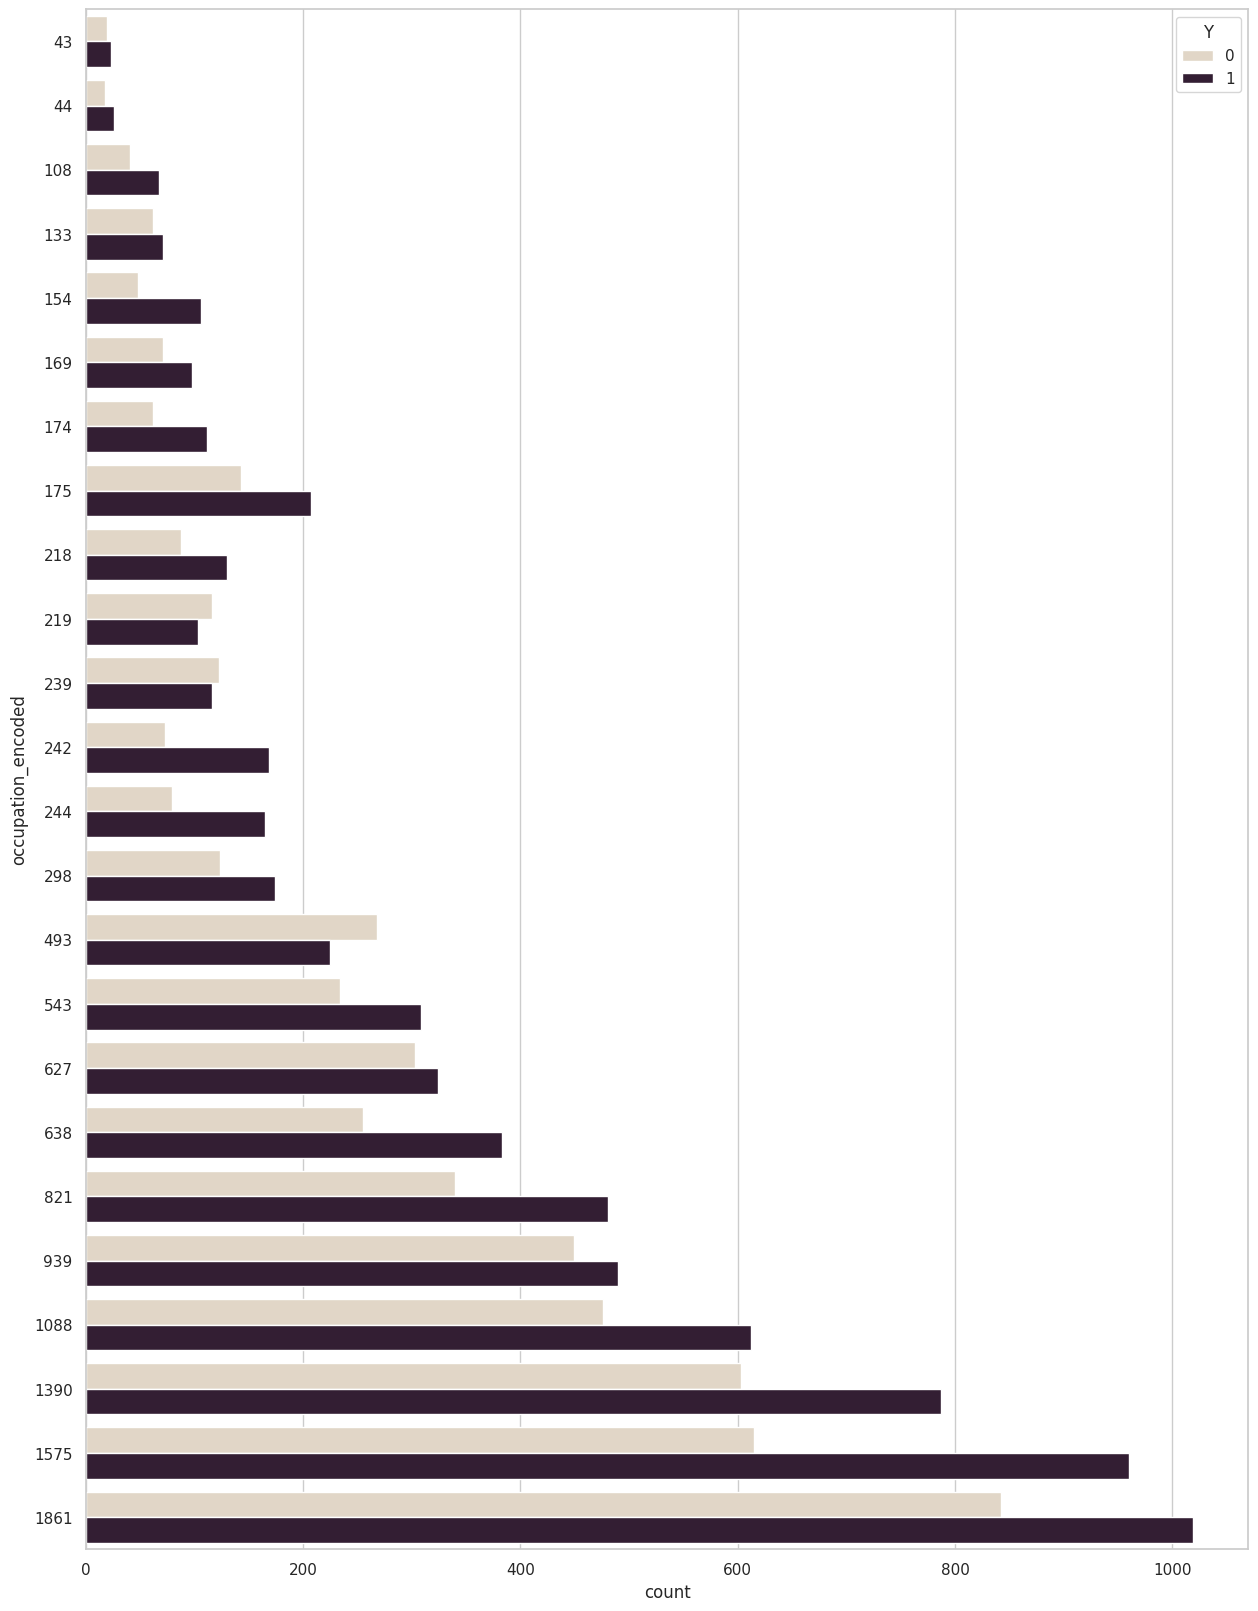

In [ ]:
plt.subplots(figsize=(15, 20))
sns.countplot(y ='occupation_encoded', hue='Y', data=data, palette='ch:.25');
plt.show()

In [ ]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [ ]:
data = pd.get_dummies(data, columns=['coupon'], prefix='coupon')

In [ ]:
data

,time,age,has_children,income,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,...,Bar_encoded,expiration_encoded,occupation_encoded,education_encoded,CoffeeHouse_encoded,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20)
0,2PM,21,1,$37500 - $49999,1~3,4~8,1~3,0,0,0,...,4,0,1861,5,4,0,0,0,0,1
1,10AM,21,1,$37500 - $49999,1~3,4~8,1~3,0,0,0,...,4,1,1861,5,4,0,0,1,0,0
2,10AM,21,1,$37500 - $49999,1~3,4~8,1~3,1,0,0,...,4,1,1861,5,4,0,1,0,0,0
3,2PM,21,1,$37500 - $49999,1~3,4~8,1~3,1,0,0,...,4,1,1861,5,4,0,0,1,0,0
4,2PM,21,1,$37500 - $49999,1~3,4~8,1~3,1,0,0,...,4,0,1861,5,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,6PM,26,0,$75000 - $87499,1~3,4~8,1~3,0,0,1,...,4,0,1088,1,4,0,1,0,0,0
12680,7AM,26,0,$75000 - $87499,1~3,4~8,1~3,0,0,0,...,4,0,1088,1,4,0,1,0,0,0
12681,7AM,26,0,$75000 - $87499,1~3,4~8,1~3,0,0,1,...,4,0,1088,1,4,0,0,1,0,0
12682,7AM,26,0,$75000 - $87499,1~3,4~8,1~3,1,1,0,...,4,0,1088,1,4,1,0,0,0,0


In [ ]:
data['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

In [ ]:
# Define a custom encoding dictionary for time values
time_encoding = {
    '2PM': 14,
    '6PM': 18,
    '10AM': 10,
    '10PM': 22,
    '7AM': 7,
    # Add more entries for other time values as needed
}

# Map the "time" column using the custom encoding
data['time_encoded'] = data['time'].map(time_encoding)

In [ ]:
data = data.drop('time', axis=1)

In [ ]:
data

,age,has_children,income,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,...,expiration_encoded,occupation_encoded,education_encoded,CoffeeHouse_encoded,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),time_encoded
0,21,1,$37500 - $49999,1~3,4~8,1~3,0,0,0,1,...,0,1861,5,4,0,0,0,0,1,14
1,21,1,$37500 - $49999,1~3,4~8,1~3,0,0,0,0,...,1,1861,5,4,0,0,1,0,0,10
2,21,1,$37500 - $49999,1~3,4~8,1~3,1,0,0,1,...,1,1861,5,4,0,1,0,0,0,10
3,21,1,$37500 - $49999,1~3,4~8,1~3,1,0,0,0,...,1,1861,5,4,0,0,1,0,0,14
4,21,1,$37500 - $49999,1~3,4~8,1~3,1,0,0,0,...,0,1861,5,4,0,0,1,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,26,0,$75000 - $87499,1~3,4~8,1~3,0,0,1,1,...,0,1088,1,4,0,1,0,0,0,18
12680,26,0,$75000 - $87499,1~3,4~8,1~3,0,0,0,1,...,0,1088,1,4,0,1,0,0,0,7
12681,26,0,$75000 - $87499,1~3,4~8,1~3,0,0,1,0,...,0,1088,1,4,0,0,1,0,0,7
12682,26,0,$75000 - $87499,1~3,4~8,1~3,1,1,0,0,...,0,1088,1,4,1,0,0,0,0,7


In [ ]:
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

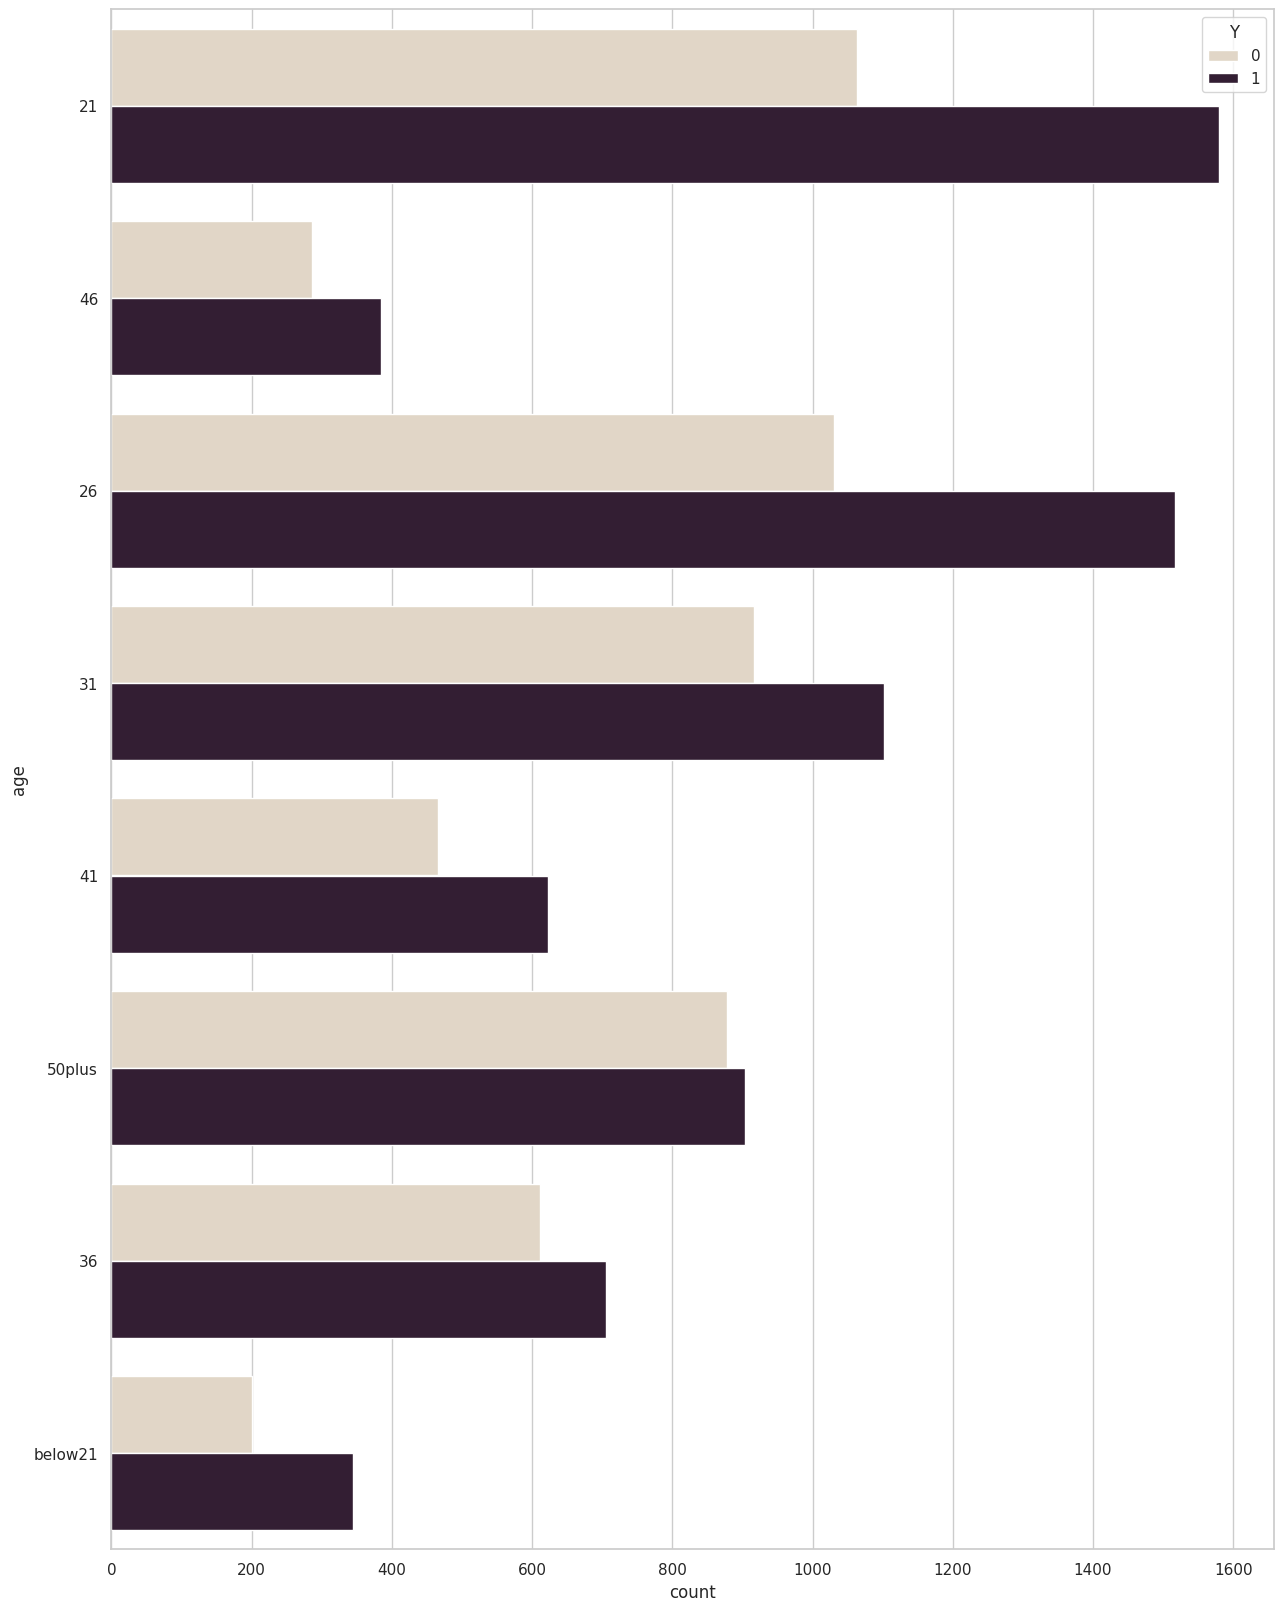

In [ ]:
plt.subplots(figsize=(15, 20))
sns.countplot(y ='age', hue='Y', data=data, palette='ch:.25');
plt.show()

In [ ]:
def probability(data, col):
    # Calculate the probability logic here
    # For example, you might calculate the ratio of "yes" to "total" for a binary outcome.
    yes_man = data.loc[(data['Y'] == 1), col].value_counts()
    value_counts = data[col].value_counts()

    val_index = value_counts.index

    ratio_yes = yes_man / value_counts

    return val_index, ratio_yes * 100

# checking the correlation to the target variable with the chi square.
# if the p-value is under 0.05, the correlation to the target variable is statistically significant.
def check_correlation(data, col, target_col):
    contingency = pd.crosstab(data[col], data[target_col])
    res = chi2_contingency(contingency)
    print(f"{col} - {target_col} : ", 'Correlated ' if res[1] < 0.05 else 'Not Correlated', ',', res[1])

# show the distribution of the column and its probability
def show_dist_prob(data, col):
    idx_occ, prob_occ = probability(data, col)

    occ_val_counts = data[col].value_counts()

    fig = make_subplots.make_subplots(cols=2, rows=1, subplot_titles=['Value Counts', 'Acceptance Probability'], shared_yaxes=True)

    fig.add_trace(
        go.Bar(x=occ_val_counts, y=occ_val_counts.index, orientation='h'),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(x=prob_occ, y=idx_occ, orientation='h'),
        row=1, col=2
    )

    fig.update_layout(title=col, width=800, height=600)

    fig.show()

# You would need to define the 'probability' function and data elsewhere in your code before calling show_dist_prob and check_correlation.
show_dist_prob(data.copy(), 'age')
check_correlation(data, 'Y', 'income')

Y - income :  Correlated  , 4.2204009018346824e-08


In [ ]:
data['age'] = data['age'].replace({'below21': '20', '50plus': '50'})

data['age'] = data['age'].astype(int)
def map_age_to_interval(age):
    if age < 21:
        return 0
    elif 21 <= age <= 30:
        return 1
    elif 31 <= age <= 40:
        return 2
    elif 41 <= age <= 50:
        return 3
    else:
        return 4

# Apply the custom function to create the "age_interval" column
data['age_interval'] = data['age'].apply(map_age_to_interval)

In [ ]:
data = data.drop('age',axis=1)

In [ ]:
data.dtypes

has_children                     int64
income                          object
CarryAway                       object
RestaurantLessThan20            object
Restaurant20To50                object
toCoupon_GEQ15min                int64
toCoupon_GEQ25min                int64
direction_same                   int64
Y                                int64
passenger_encoded                int64
weather_encoded                  int64
temperature_encoded              int64
gender_encoded                   int64
destination_encoded              int64
maritalStatus_encoded            int64
Bar_encoded                      int64
expiration_encoded               int64
occupation_encoded               int64
education_encoded                int64
CoffeeHouse_encoded              int64
coupon_Bar                       uint8
coupon_Carry out & Take away     uint8
coupon_Coffee House              uint8
coupon_Restaurant(20-50)         uint8
coupon_Restaurant(<20)           uint8
time_encoded             

In [ ]:
data['CoffeeHouse_encoded'].unique()

array([4, 3, 1, 0, 2])

In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'education' column
data['RestaurantLessThan20_encoded'] = label_encoder.fit_transform(data['RestaurantLessThan20'])
data = data.drop('RestaurantLessThan20', axis=1)

data['Restaurant20To50_encoded'] = label_encoder.fit_transform(data['Restaurant20To50'])
data = data.drop('Restaurant20To50', axis=1)

In [ ]:

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'education' column
data['CarryAway_encoded'] = label_encoder.fit_transform(data['CarryAway'])
data = data.drop('CarryAway', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   has_children                  12610 non-null  int64 
 1   income                        12610 non-null  object
 2   toCoupon_GEQ15min             12610 non-null  int64 
 3   toCoupon_GEQ25min             12610 non-null  int64 
 4   direction_same                12610 non-null  int64 
 5   Y                             12610 non-null  int64 
 6   passenger_encoded             12610 non-null  int64 
 7   weather_encoded               12610 non-null  int64 
 8   temperature_encoded           12610 non-null  int64 
 9   gender_encoded                12610 non-null  int64 
 10  destination_encoded           12610 non-null  int64 
 11  maritalStatus_encoded         12610 non-null  int64 
 12  Bar_encoded                   12610 non-null  int64 
 13  expiration_encod

In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'education' column
data['income_encoded'] = label_encoder.fit_transform(data['income'])
data = data.drop('income', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   has_children                  12610 non-null  int64
 1   toCoupon_GEQ15min             12610 non-null  int64
 2   toCoupon_GEQ25min             12610 non-null  int64
 3   direction_same                12610 non-null  int64
 4   Y                             12610 non-null  int64
 5   passenger_encoded             12610 non-null  int64
 6   weather_encoded               12610 non-null  int64
 7   temperature_encoded           12610 non-null  int64
 8   gender_encoded                12610 non-null  int64
 9   destination_encoded           12610 non-null  int64
 10  maritalStatus_encoded         12610 non-null  int64
 11  Bar_encoded                   12610 non-null  int64
 12  expiration_encoded            12610 non-null  int64
 13  occupation_encoded            1

In [ ]:
data['distance'] = None
data.loc[data['toCoupon_GEQ15min'] == 0, 'distance'] = 0
data.loc[(data['toCoupon_GEQ15min'] == 1) & \
             (data['toCoupon_GEQ25min'] == 0), 'distance'] = 1
data.loc[data['toCoupon_GEQ25min'] == 1, 'distance'] = 2
data.distance.isna().sum()

0

In [ ]:
data.drop(columns=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)


In [ ]:
data

,has_children,direction_same,Y,passenger_encoded,weather_encoded,temperature_encoded,gender_encoded,destination_encoded,maritalStatus_encoded,Bar_encoded,...,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),time_encoded,age_interval,RestaurantLessThan20_encoded,Restaurant20To50_encoded,CarryAway_encoded,income_encoded,distance
0,1,0,1,0,2,1,0,1,3,4,...,0,0,1,14,1,1,0,0,3,0
1,1,0,0,1,2,2,0,1,3,4,...,1,0,0,10,1,1,0,0,3,0
2,1,0,1,1,2,2,0,1,3,4,...,0,0,0,10,1,1,0,0,3,1
3,1,0,0,1,2,2,0,1,3,4,...,1,0,0,14,1,1,0,0,3,1
4,1,0,0,1,2,2,0,1,3,4,...,1,0,0,14,1,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,1,1,3,0,1,1,0,2,4,...,0,0,0,18,1,1,0,0,6,0
12680,0,0,1,0,0,1,1,2,2,4,...,0,0,0,7,1,1,0,0,6,0
12681,0,1,0,0,1,0,1,2,2,4,...,1,0,0,7,1,1,0,0,6,0
12682,0,0,0,0,1,0,1,2,2,4,...,0,0,0,7,1,1,0,0,6,2


<ipython-input-895-9877a25f6204>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



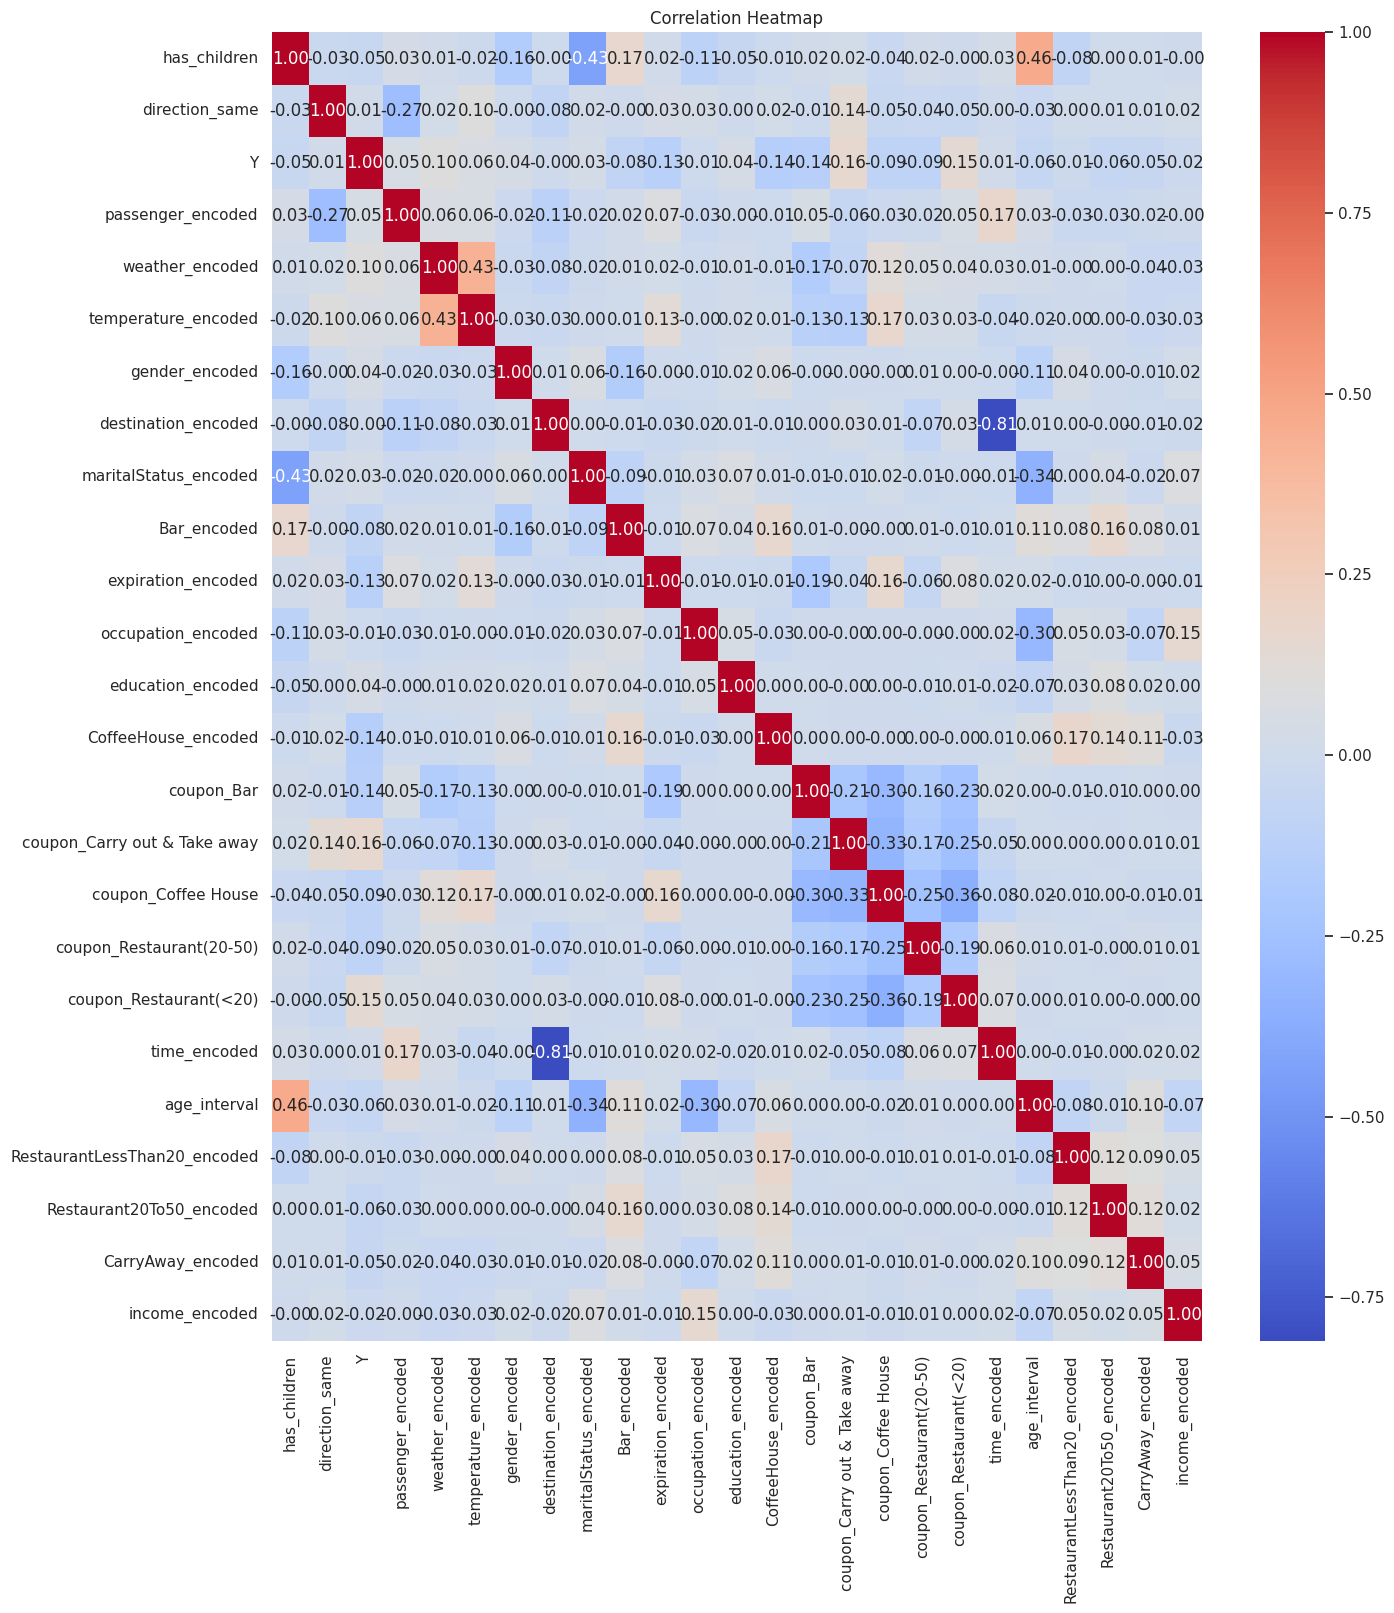

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 17))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

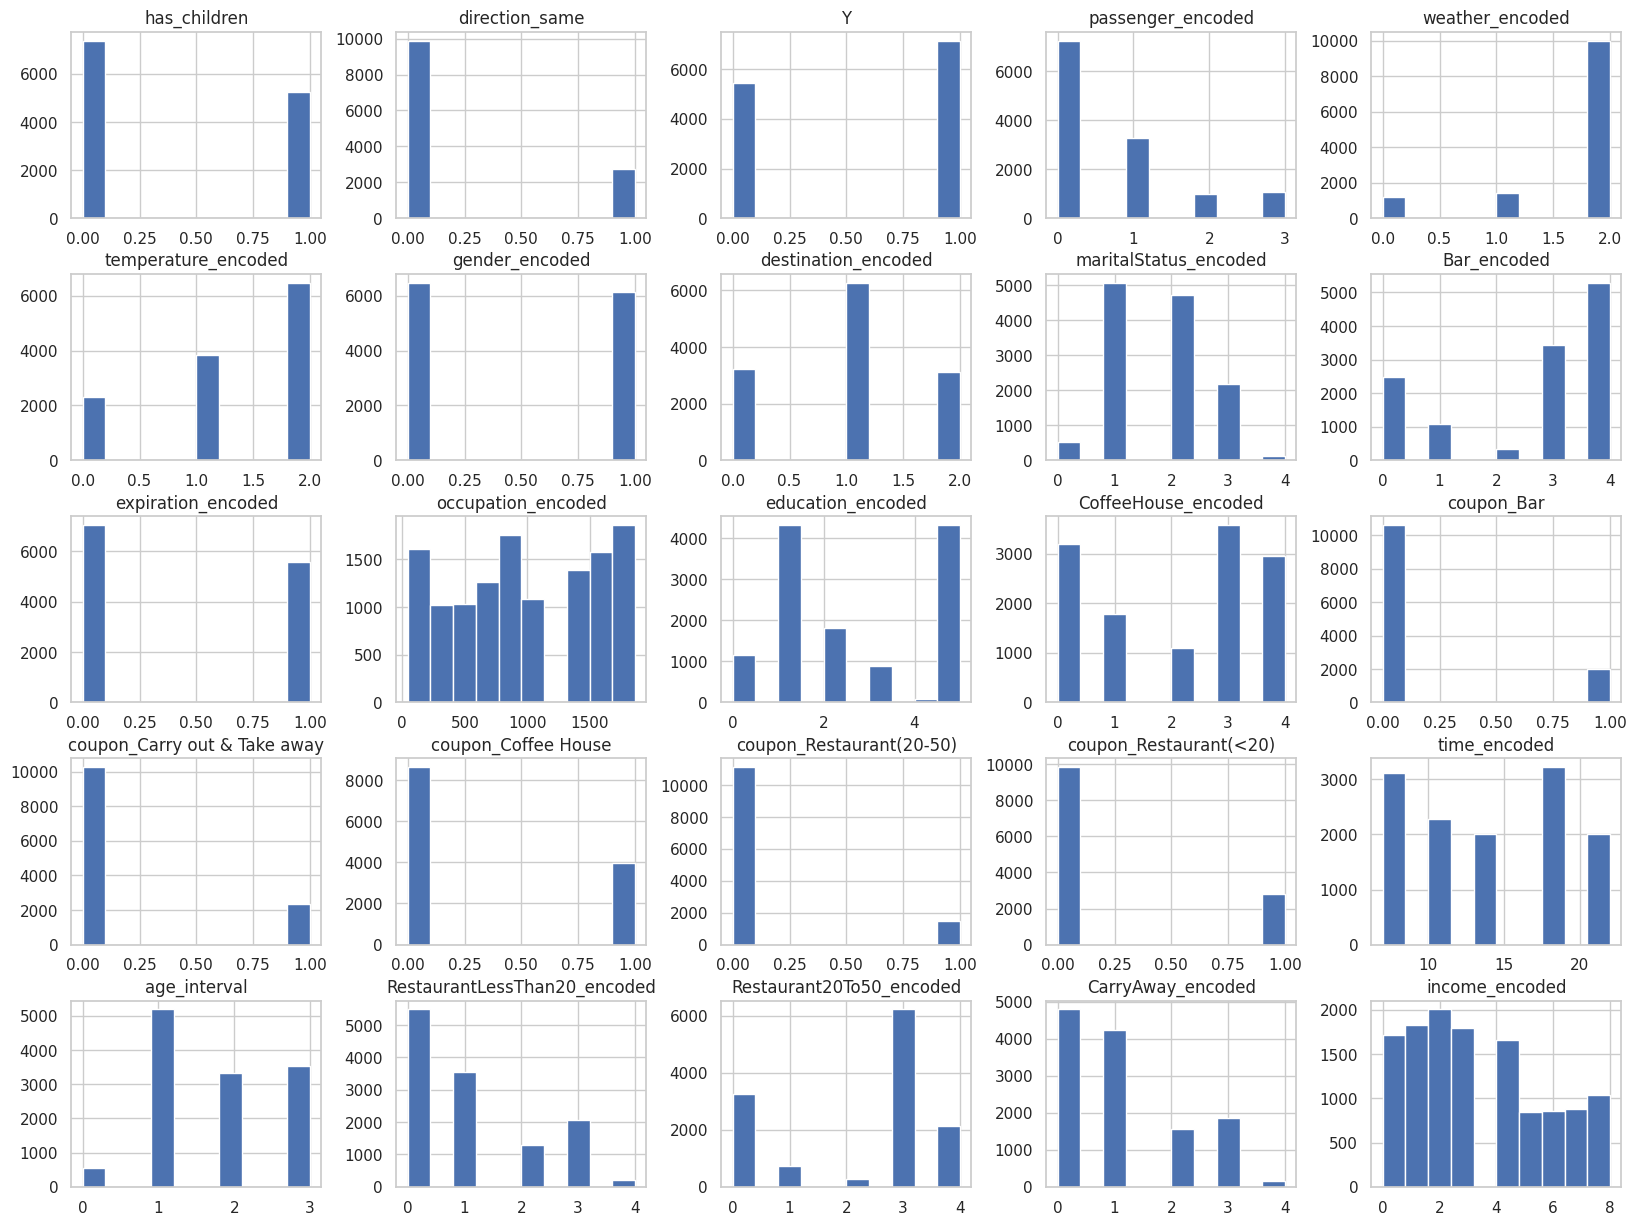

In [ ]:
data.hist(figsize=(20, 15))
plt.show()

In [ ]:

# Assuming you have a DataFrame named 'df' with mixed data types
numeric_columns = data.select_dtypes(include=[np.number])

for column in numeric_columns:
    skewness = skew(data[column])
    kurt = kurtosis(data[column], fisher=True)

    print(f"Feature: {column}")
    print("Skewness:", skewness)
    print("Excess Kurtosis:", kurt)
    print()

Feature: has_children
Skewness: 0.3470612065432148
Excess Kurtosis: -1.879548518912768

Feature: direction_same
Skewness: 1.3835491513309097
Excess Kurtosis: -0.08579174585152005

Feature: Y
Skewness: -0.27276354928166563
Excess Kurtosis: -1.9256000461832687

Feature: passenger_encoded
Skewness: 1.2981068077471012
Excess Kurtosis: 0.6189166581194803

Feature: weather_encoded
Skewness: -1.901211060844
Excess Kurtosis: 2.1338500793657538

Feature: temperature_encoded
Skewness: -0.6399241505479865
Excess Kurtosis: -1.0264774680484967

Feature: gender_encoded
Skewness: 0.05203981205971545
Excess Kurtosis: -1.9972918579607895

Feature: destination_encoded
Skewness: 0.013127777891328424
Excess Kurtosis: -1.0119545632789495

Feature: maritalStatus_encoded
Skewness: 0.27005525524679314
Excess Kurtosis: -0.4863083771637622

Feature: Bar_encoded
Skewness: -0.7667047071550795
Excess Kurtosis: -1.0269438045069088

Feature: expiration_encoded
Skewness: 0.23183547238802857
Excess Kurtosis: -1.946252

#DATA Splitting

In [ ]:

# Split the data into X (features) and y (target variable)
X = data.drop(columns=['Y'])  # Exclude the target variable 'Y'
y = data['Y']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.head()

2874     0
11153    0
11863    0
8943     1
3058     1
Name: Y, dtype: int64

#DATA standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(10088, 25)

<function matplotlib.pyplot.legend(*args, **kwargs)>

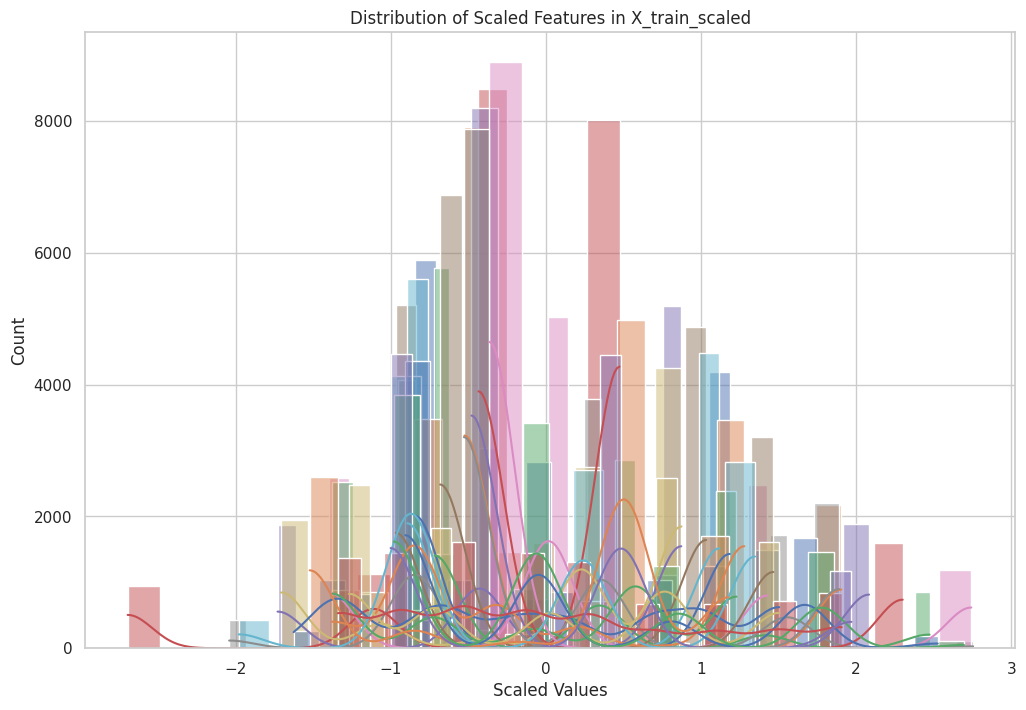

In [ ]:
# Create a DataFrame from X_train_scaled
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot histograms for all features in X_train_scaled_df
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Iterate through each feature and plot its distribution
for feature in X_train_scaled_df.columns:
    sns.histplot(X_train_scaled_df[feature], kde=True, label=feature)

plt.xlabel("Scaled Values")
plt.title("Distribution of Scaled Features in X_train_scaled")
plt.legend

# data Normalisation

In [ ]:

# Create a Min-Max Scaler object
min_max_scaler = MinMaxScaler()

# Fit the scaler to your standardized data
min_max_scaler.fit(X_train)
min_max_scaler.fit(X_test)


# Transform your data to the desired range (usually 0 to 1)
X_train_normalized = min_max_scaler.transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

<function matplotlib.pyplot.legend(*args, **kwargs)>

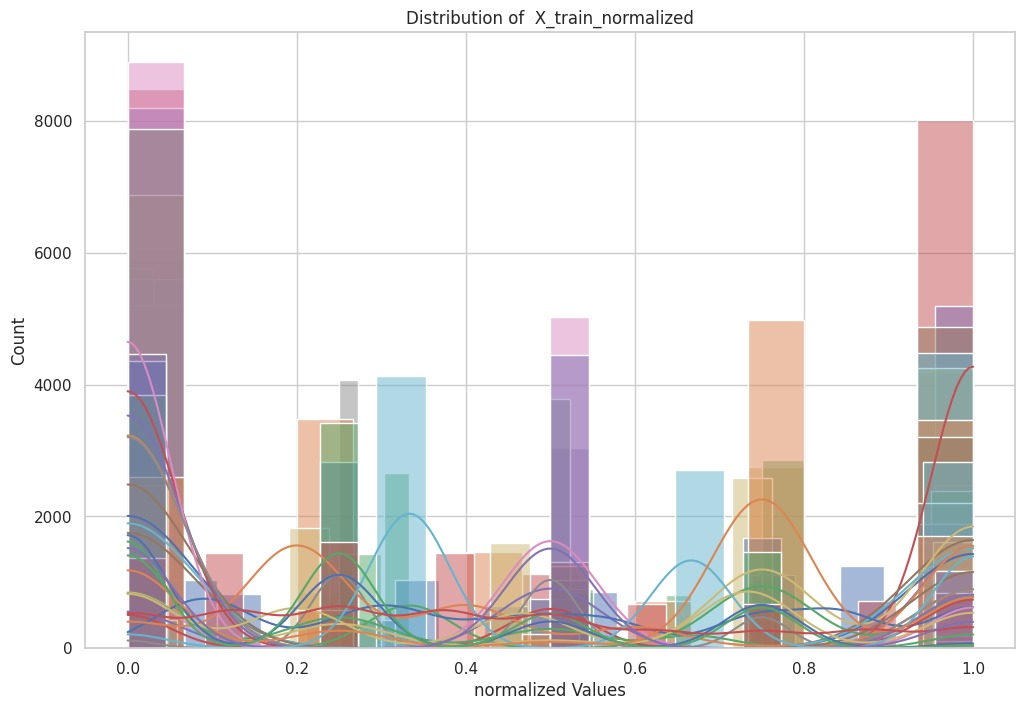

In [ ]:
# Create a DataFrame from X_train_scaled
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)

# Plot histograms for all features in X_train_scaled_df
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Iterate through each feature and plot its distribution
for feature in X_train_normalized_df.columns:
    sns.histplot(X_train_normalized_df[feature], kde=True, label=feature)

plt.xlabel("normalized Values")
plt.title("Distribution of  X_train_normalized")
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

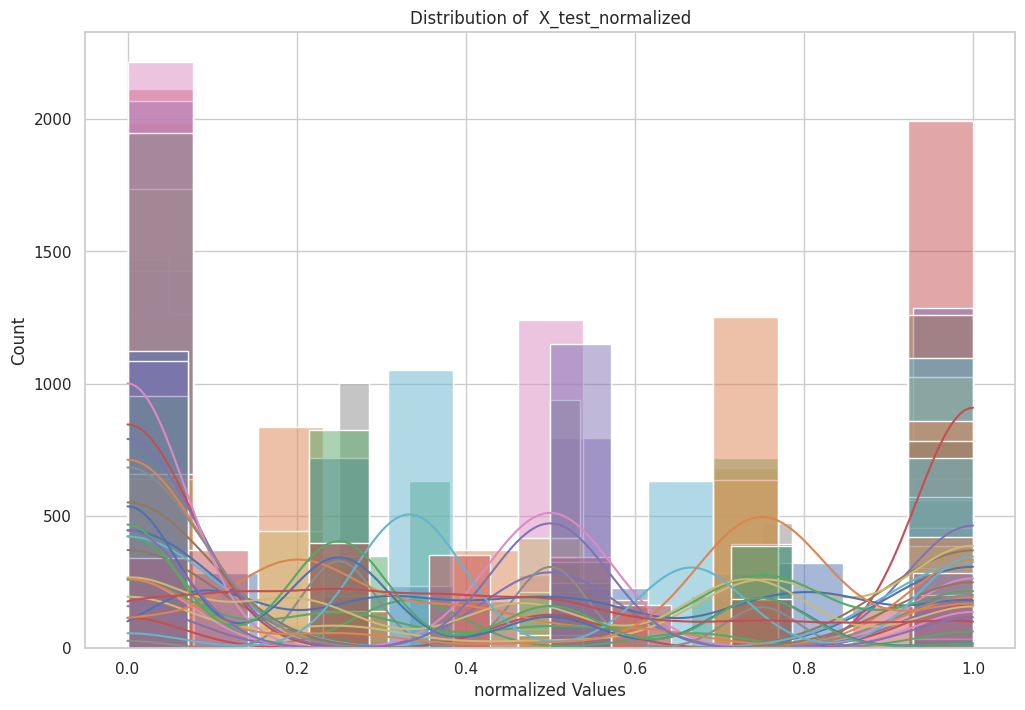

In [ ]:
# Create a DataFrame from X_train_scaled
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_train.columns)

# Plot histograms for all features in X_train_scaled_df
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Iterate through each feature and plot its distribution
for feature in X_test_normalized_df.columns:
    sns.histplot(X_test_normalized_df[feature], kde=True, label=feature)

plt.xlabel("normalized Values")
plt.title("Distribution of  X_test_normalized")
plt.legend

#EXPORT DATA

In [ ]:

Y_train = y_train.reset_index(drop=True)  # Reset the index to ensure alignment
# Concatenate X_train and Y_train along columns (axis=1)
combined_train = pd.concat([X_train_normalized_df, Y_train], axis=1)
# Export the combined dataset to a CSV file
combined_train.to_csv('clean_data.csv', index=False)